# Gerardo de Miguel González

# PCA Proof of Concept

## References

**::GMG::** Worked example from Statquest

  - [StatQuest](https://statquest.org/2017/11/27/statquest-pca-in-r-clearly-explained/) - [Youtube](https://www.youtube.com/watch?v=0Jp4gsfOLMs): PCA in R, Clearly Explained!!!, by Josh Starmer, November 27, 2017

## Libraries

In [1]:
#::GMG::Helper function to install missing libraries before loading them
# https://stackoverflow.com/questions/4090169/elegant-way-to-check-for-missing-packages-and-install-them
#::NOTE::It does not work with the bioconductor packages that need their own package manager (!)
using<-function(...) {
    libs<-unlist(list(...))
    req<-unlist(lapply(libs,require,character.only=TRUE))
    need<-libs[req==FALSE]
    if(length(need)>0){ 
        install.packages(need)
        lapply(need,require,character.only=TRUE)
    }
}

## Dataset (synthetic)

In [2]:
## In this example, the data is in a matrix called
## data.matrix
## columns are individual samples (i.e. cells)
## rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, here's some made up data...
data.matrix <- matrix(nrow = 100, ncol = 10)

In [3]:
colnames(data.matrix) <- c(paste("wt", 1:5, sep=""), paste("ko", 1:5, sep=""))
rownames(data.matrix) <- paste("gene", 1:100, sep="")

In [4]:
for (i in 1:100) {
  wt.values <- rpois(5, lambda=sample(x=10:1000, size=1))
  ko.values <- rpois(5, lambda=sample(x=10:1000, size=1))
 
  data.matrix[i,] <- c(wt.values, ko.values)
}

In [5]:
head(data.matrix)

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,887,874,845,865,867,930,926,874,934,907
gene2,301,292,260,280,290,12,19,21,19,17
gene3,653,655,630,626,630,224,213,214,207,201
gene4,788,777,748,791,811,587,654,567,624,619
gene5,553,575,539,556,564,466,472,471,470,492
gene6,948,920,923,902,941,300,314,276,270,278


In [6]:
dim(data.matrix)

[1] 100  10

In [7]:
class(data.matrix)

[1] "matrix"

In [8]:
str(data.matrix)

 int [1:100, 1:10] 887 301 653 788 553 948 67 660 356 243 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:100] "gene1" "gene2" "gene3" "gene4" ...
  ..$ : chr [1:10] "wt1" "wt2" "wt3" "wt4" ...


In [62]:
summary(data.matrix)

      wt1              wt2              wt3              wt4        
 Min.   :  16.0   Min.   :  17.0   Min.   :  17.0   Min.   :  22.0  
 1st Qu.: 242.8   1st Qu.: 245.8   1st Qu.: 266.5   1st Qu.: 252.0  
 Median : 436.5   Median : 459.5   Median : 463.5   Median : 446.0  
 Mean   : 496.8   Mean   : 495.0   Mean   : 496.5   Mean   : 493.8  
 3rd Qu.: 737.8   3rd Qu.: 726.5   3rd Qu.: 742.8   3rd Qu.: 721.5  
 Max.   :1024.0   Max.   :1060.0   Max.   :1060.0   Max.   :1004.0  
      wt5              ko1              ko2              ko3        
 Min.   :  15.0   Min.   :  12.0   Min.   :  17.0   Min.   :  16.0  
 1st Qu.: 262.2   1st Qu.: 223.5   1st Qu.: 228.0   1st Qu.: 217.0  
 Median : 462.0   Median : 456.5   Median : 457.0   Median : 452.5  
 Mean   : 498.3   Mean   : 469.5   Mean   : 472.2   Mean   : 468.8  
 3rd Qu.: 729.0   3rd Qu.: 687.5   3rd Qu.: 693.0   3rd Qu.: 698.8  
 Max.   :1024.0   Max.   :1007.0   Max.   :1016.0   Max.   :1025.0  
      ko4              ko5        

## PCA

In [9]:
pca <- prcomp(t(data.matrix), scale=TRUE) 

In [10]:
class(pca)

[1] "prcomp"

In [11]:
str(pca)

List of 5
 $ sdev    : num [1:10] 9.5 1.52 1.42 1.27 1.03 ...
 $ rotation: num [1:100, 1:10] 0.0828 -0.1051 -0.1052 -0.1007 -0.1025 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:100] "gene1" "gene2" "gene3" "gene4" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:100] 891 151 425 697 516 ...
  ..- attr(*, "names")= chr [1:100] "gene1" "gene2" "gene3" "gene4" ...
 $ scale   : Named num [1:100] 31.3 141.1 225.3 95.1 45.3 ...
  ..- attr(*, "names")= chr [1:100] "gene1" "gene2" "gene3" "gene4" ...
 $ x       : num [1:10, 1:10] -9.13 -9.18 -8.59 -8.98 -9.14 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "wt1" "wt2" "wt3" "wt4" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


## Visualizations

### base

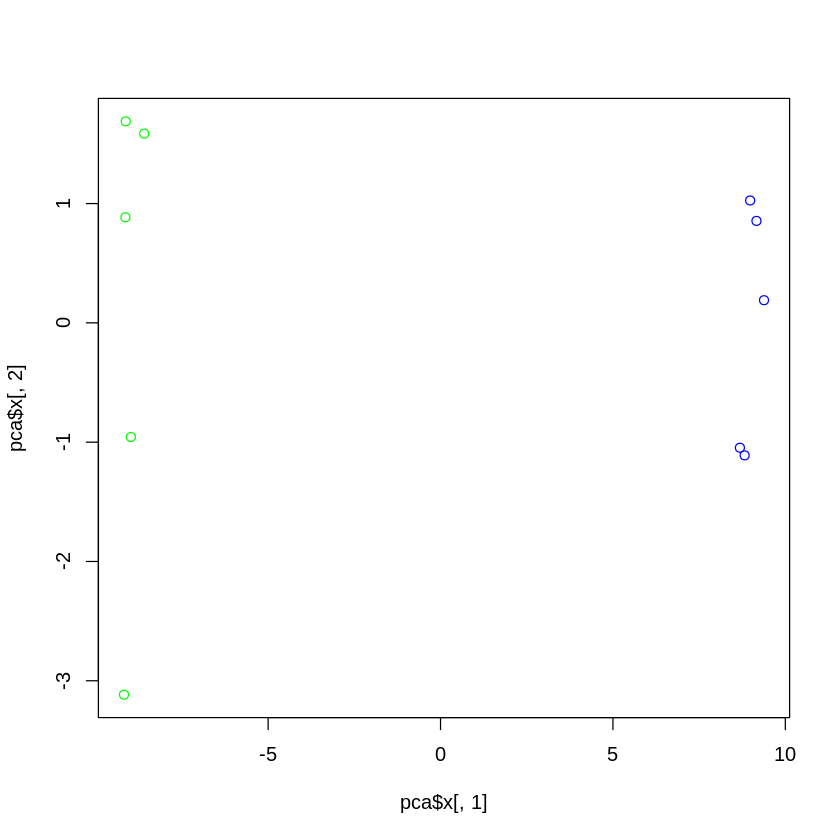

In [105]:
## plot pc1 and pc2
# https://wiki.bits.vib.be/index.php/How_to_create_a_PCA_plot_of_microarray_data
#::NOTE::2 groups of five samples
#plot(pca$x[,1], pca$x[,2])
color <- c('green','green','green','green','green','blue','blue','blue','blue', 'blue')
plot(pca$x[,1], pca$x[,2], col = color)

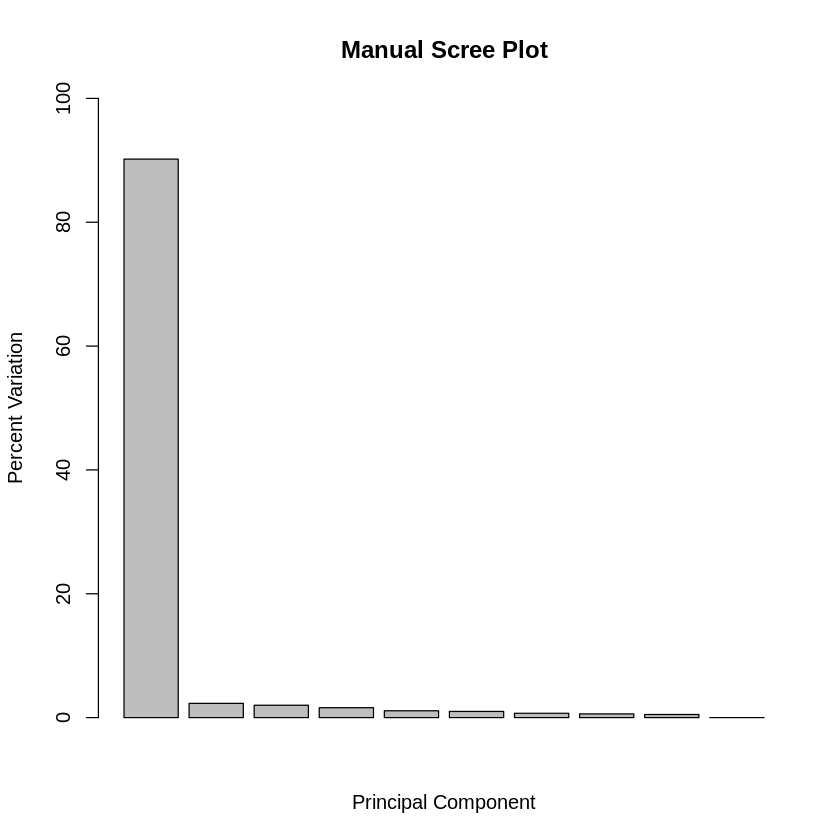

In [68]:
## make a scree plot
pca.var <- pca$sdev^2
pca.var.per <- round(pca.var/sum(pca.var)*100, 1) 
barplot(pca.var.per, 
        main="Manual Scree Plot", 
        xlab="Principal Component", 
        ylab="Percent Variation", 
        ylim = c(0,100))

### stats screeplot

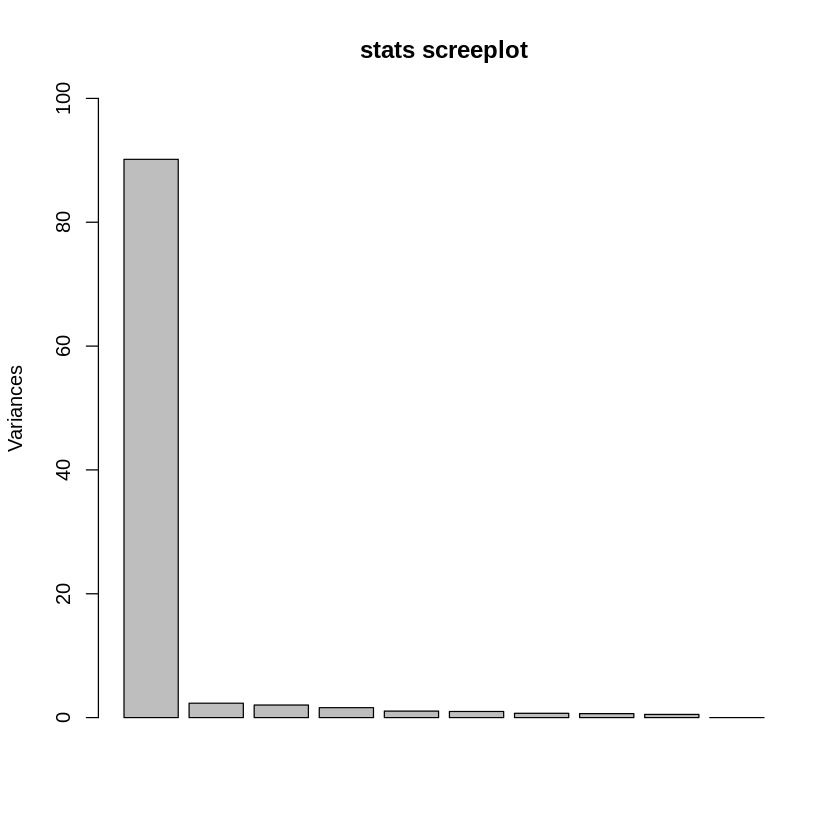

In [66]:
#::GMG::stats (default package) have a screeplot() function
# https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/screeplot
stats::screeplot(x = pca, 
                 type = 'barplot', 
                 main = 'stats screeplot', 
                 ylim = c(0,100))

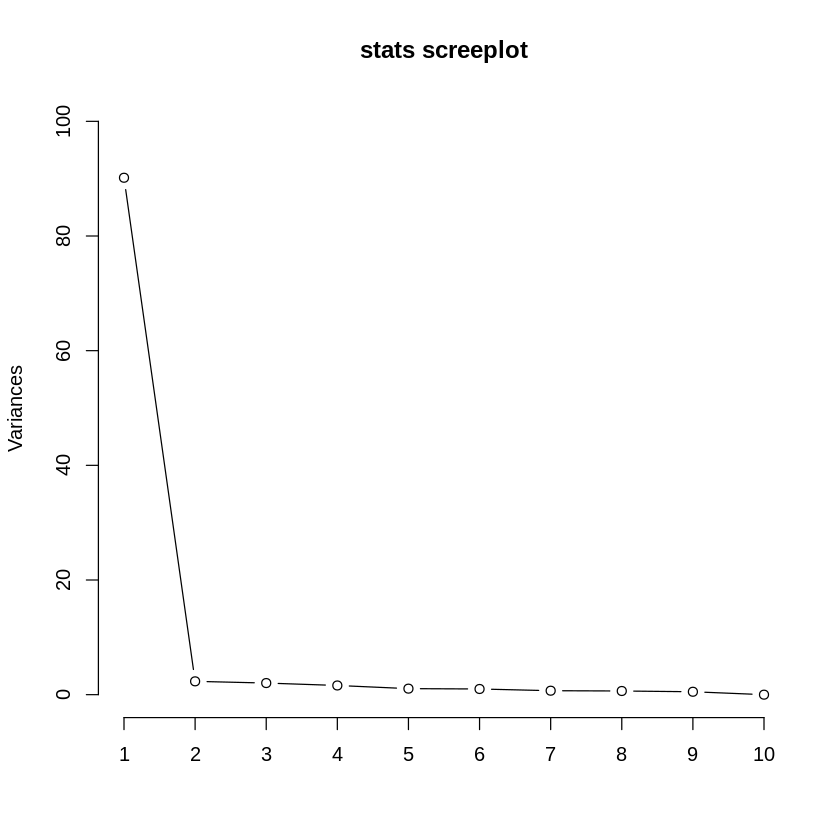

In [70]:
# https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/screeplot
stats::screeplot(x = pca, 
                 type = 'line', 
                 main = 'stats screeplot',
                 ylim = c(0,100))

### ggplot

In [14]:
## now make a fancy looking plot that shows the PCs and the variation:
# library(ggplot2)
using('ggplot2')

In [15]:
pca.data <- data.frame(
  Sample=rownames(pca$x),
  X=pca$x[,1],
  Y=pca$x[,2]
)

In [16]:
pca.data

,Sample,X,Y
,<fct>,<dbl>,<dbl>
wt1,wt1,-9.129443,1.6891760
wt2,wt2,-9.180135,-3.1165553
wt3,wt3,-8.594982,1.5862242
wt4,wt4,-8.981195,-0.9567995
wt5,wt5,-9.139404,0.8850076
ko1,ko1,8.979264,1.0257563
ko2,ko2,9.381317,0.1899133
ko3,ko3,8.819686,-1.1107498
ko4,ko4,9.162708,0.8546567


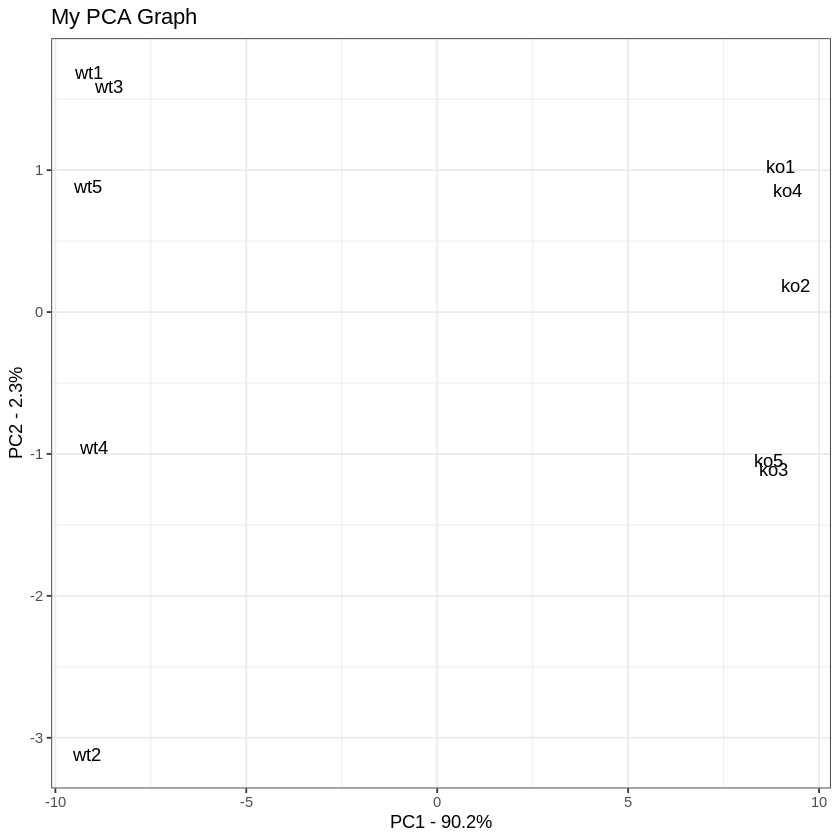

In [17]:
ggplot(data=pca.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  xlab(paste("PC1 - ", pca.var.per[1], "%", sep="")) +
  ylab(paste("PC2 - ", pca.var.per[2], "%", sep="")) +
  theme_bw() +
  ggtitle("My PCA Graph")

## Rank genes by loadings

In [18]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
loading_scores <- pca$rotation[,1]
gene_scores <- abs(loading_scores) ## get the magnitudes
gene_score_ranked <- sort(gene_scores, decreasing=TRUE)
top_10_genes <- names(gene_score_ranked[1:10])

In [19]:
top_10_genes ## show the names of the top 10 genes

[1] "gene38" "gene68" "gene94" "gene87" "gene40" "gene7"  "gene11" "gene3" 
 [9] "gene48" "gene71"

In [20]:
pca$rotation[top_10_genes,1] ## show the scores (and +/- sign)

gene38     gene68     gene94     gene87     gene40      gene7     gene11 
 0.1052741 -0.1052472  0.1052334  0.1052118 -0.1052098  0.1051950 -0.1051841 
     gene3     gene48     gene71 
-0.1051829 -0.1051672 -0.1051653

## Bonus

###  svd

In [21]:
#######
##
## NOTE: Everything that follow is just bonus stuff.
## It simply demonstrates how to get the same
## results using "svd()" (Singular Value Decomposition) or using "eigen()"
## (Eigen Decomposition).
##
##
#######
 
############################################
##
## Now let's do the same thing with svd()
##
## svd() returns three things
## v = the "rotation" that prcomp() returns, this is a matrix of eigenvectors
##     in other words, a matrix of loading scores
## u = this is similar to the "x" that prcomp() returns. In other words,
##     sum(the rotation * the original data), but compressed to the unit vector
##     You can spread it out by multiplying by "d"
## d = this is similar to the "sdev" value that prcomp() returns (and thus
##     related to the eigen values), but not
##     scaled by sample size in an unbiased way (ie. 1/(n-1)).
##     For prcomp(), sdev = sqrt(var) = sqrt(ss(fit)/(n-1))
##     For svd(), d = sqrt(ss(fit))
############################################
#
# https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/svd
svd.stuff <- svd(scale(t(data.matrix), center=TRUE))

In [22]:
class(svd.stuff)

[1] "list"

In [23]:
str(svd.stuff)

List of 3
 $ d: num [1:10] 28.49 4.57 4.27 3.8 3.08 ...
 $ u: num [1:10, 1:10] -0.32 -0.322 -0.302 -0.315 -0.321 ...
 $ v: num [1:100, 1:10] 0.0828 -0.1051 -0.1052 -0.1007 -0.1025 ...


In [24]:
## calculate the PCs
svd.data <- data.frame(
  Sample = colnames(data.matrix),
  X = (svd.stuff$u[,1] * svd.stuff$d[1]),
  Y = (svd.stuff$u[,2] * svd.stuff$d[2])
)

In [25]:
svd.data 

Sample,X,Y
<fct>,<dbl>,<dbl>
wt1,-9.129443,1.6891760
wt2,-9.180135,-3.1165553
wt3,-8.594982,1.5862242
wt4,-8.981195,-0.9567995
wt5,-9.139404,0.8850076
ko1,8.979264,1.0257563
ko2,9.381317,0.1899133
ko3,8.819686,-1.1107498
ko4,9.162708,0.8546567


In [26]:
class(svd.data)

[1] "data.frame"

In [27]:
str(svd.data)

'data.frame':	10 obs. of  3 variables:
 $ Sample: Factor w/ 10 levels "ko1","ko2","ko3",..: 6 7 8 9 10 1 2 3 4 5
 $ X     : num  -9.13 -9.18 -8.59 -8.98 -9.14 ...
 $ Y     : num  1.689 -3.117 1.586 -0.957 0.885 ...


In [28]:
## alternatively, we could compute the PCs with the eigen vectors and the
## original data
svd.pcs <- t(t(svd.stuff$v) %*% t(scale(t(data.matrix), center=TRUE)))
svd.pcs[,1:2] ## the first to principal components

wt1,-9.129443,1.6891760
wt2,-9.180135,-3.1165553
wt3,-8.594982,1.5862242
wt4,-8.981195,-0.9567995
wt5,-9.139404,0.8850076
ko1,8.979264,1.0257563
ko2,9.381317,0.1899133
ko3,8.819686,-1.1107498
ko4,9.162708,0.8546567
ko5,8.682186,-1.0466295


In [29]:
class(svd.pcs)

[1] "matrix"

In [30]:
dim(svd.pcs)

[1] 10 10

In [31]:
str(svd.pcs)

 num [1:10, 1:10] -9.13 -9.18 -8.59 -8.98 -9.14 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:10] "wt1" "wt2" "wt3" "wt4" ...
  ..$ : NULL


In [32]:
svd.df <- ncol(data.matrix) - 1
svd.var <- svd.stuff$d^2 / svd.df
svd.var.per <- round(svd.var/sum(svd.var)*100, 1)

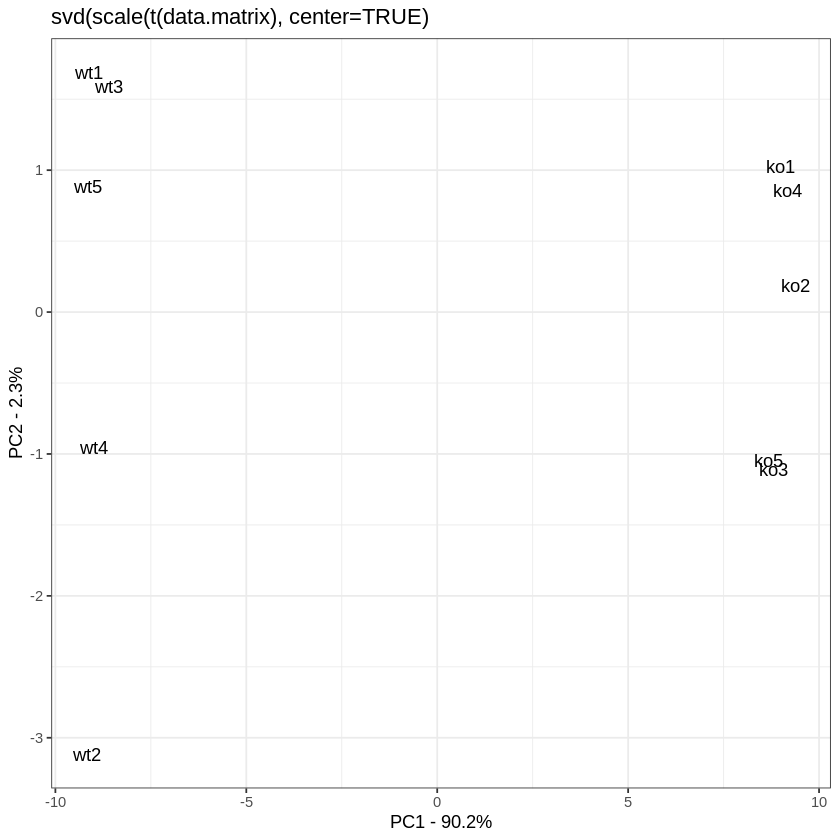

In [33]:
ggplot(data=svd.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  xlab(paste("PC1 - ", svd.var.per[1], "%", sep="")) +
  ylab(paste("PC2 - ", svd.var.per[2], "%", sep="")) +
  theme_bw() +
  ggtitle("svd(scale(t(data.matrix), center=TRUE)")

### eigen

In [34]:
############################################
##
## Now let's do the same thing with eigen()
##
## eigen() returns two things...
## vectors = eigen vectors (vectors of loading scores)
##           NOTE: pcs = sum(loading scores * values for sample)
## values = eigen values
############################################
cov.mat <- cov(scale(t(data.matrix), center=TRUE))

In [35]:
class(cov.mat)

[1] "matrix"

In [36]:
dim(cov.mat)

[1] 100 100

In [37]:
str(cov.mat)

 num [1:100, 1:100] 1 -0.764 -0.773 -0.643 -0.744 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:100] "gene1" "gene2" "gene3" "gene4" ...
  ..$ : chr [1:100] "gene1" "gene2" "gene3" "gene4" ...


In [38]:
## since the covariance matrix is symmetric, we can tell eigen() to just
## work on the lower triangle with "symmetric=TRUE"
# https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/eigen
eigen.stuff <- eigen(cov.mat, symmetric=TRUE)

In [39]:
class(eigen.stuff)

[1] "eigen"

In [40]:
str(eigen.stuff)

List of 2
 $ values : num [1:100] 90.16 2.33 2.03 1.6 1.05 ...
 $ vectors: num [1:100, 1:100] 0.0828 -0.1051 -0.1052 -0.1007 -0.1025 ...
 - attr(*, "class")= chr "eigen"


In [41]:
dim(eigen.stuff$vectors)

[1] 100 100

In [42]:
head(eigen.stuff$vectors[,1:2]) 

0.08279456,0.095330513
-0.10509911,-0.003178501
-0.10518287,0.003959135
-0.10074667,0.019539418
-0.10247751,-0.110365330
-0.10511678,0.023872161


In [43]:
eigen.pcs <- t(t(eigen.stuff$vectors) %*% t(scale(t(data.matrix), center=TRUE)))
eigen.pcs[,1:2]

wt1,-9.129443,1.6891760
wt2,-9.180135,-3.1165553
wt3,-8.594982,1.5862242
wt4,-8.981195,-0.9567995
wt5,-9.139404,0.8850076
ko1,8.979264,1.0257563
ko2,9.381317,0.1899133
ko3,8.819686,-1.1107498
ko4,9.162708,0.8546567
ko5,8.682186,-1.0466295


In [44]:
eigen.data <- data.frame(Sample=rownames(eigen.pcs),
  X=(-1 * eigen.pcs[,1]), ## eigen() flips the X-axis in this case, so we flip it back
  Y=eigen.pcs[,2]) ## X axis will be PC1, Y axis will be PC2

In [45]:
str(eigen.data)

'data.frame':	10 obs. of  3 variables:
 $ Sample: Factor w/ 10 levels "ko1","ko2","ko3",..: 6 7 8 9 10 1 2 3 4 5
 $ X     : num  9.13 9.18 8.59 8.98 9.14 ...
 $ Y     : num  1.689 -3.117 1.586 -0.957 0.885 ...


In [46]:
eigen.data

,Sample,X,Y
,<fct>,<dbl>,<dbl>
wt1,wt1,9.129443,1.6891760
wt2,wt2,9.180135,-3.1165553
wt3,wt3,8.594982,1.5862242
wt4,wt4,8.981195,-0.9567995
wt5,wt5,9.139404,0.8850076
ko1,ko1,-8.979264,1.0257563
ko2,ko2,-9.381317,0.1899133
ko3,ko3,-8.819686,-1.1107498
ko4,ko4,-9.162708,0.8546567


In [47]:
eigen.var.per <- round(eigen.stuff$values/sum(eigen.stuff$values)*100, 1)

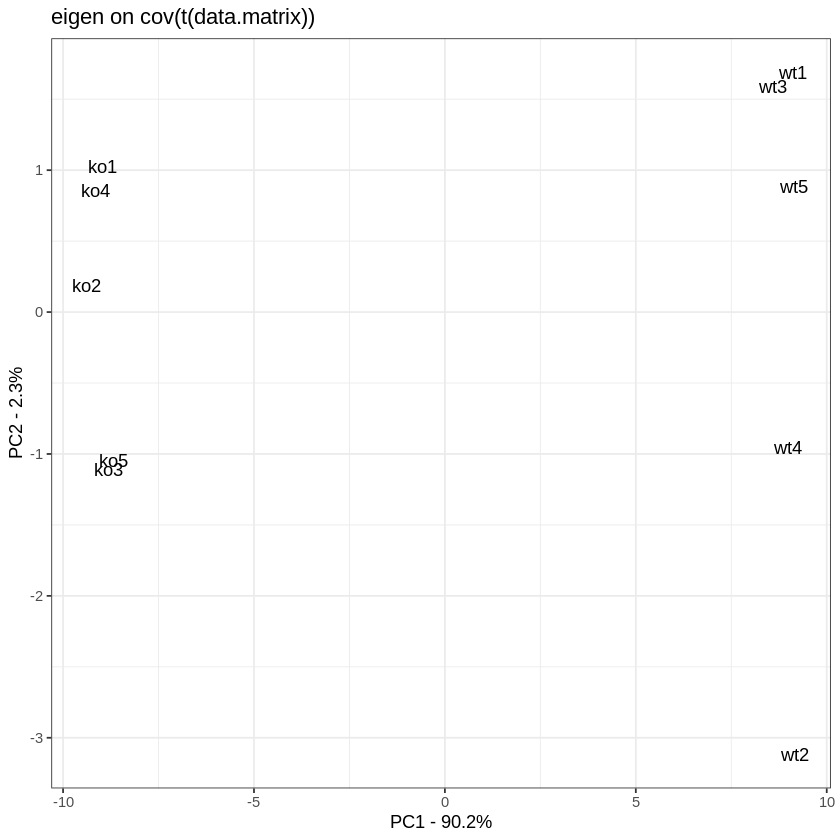

In [48]:
ggplot(data=eigen.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  xlab(paste("PC1 - ", eigen.var.per[1], "%", sep="")) +
  ylab(paste("PC2 - ", eigen.var.per[2], "%", sep="")) +
  theme_bw() +
  ggtitle("eigen on cov(t(data.matrix))")

## More Visualizations

### biplot (classical)

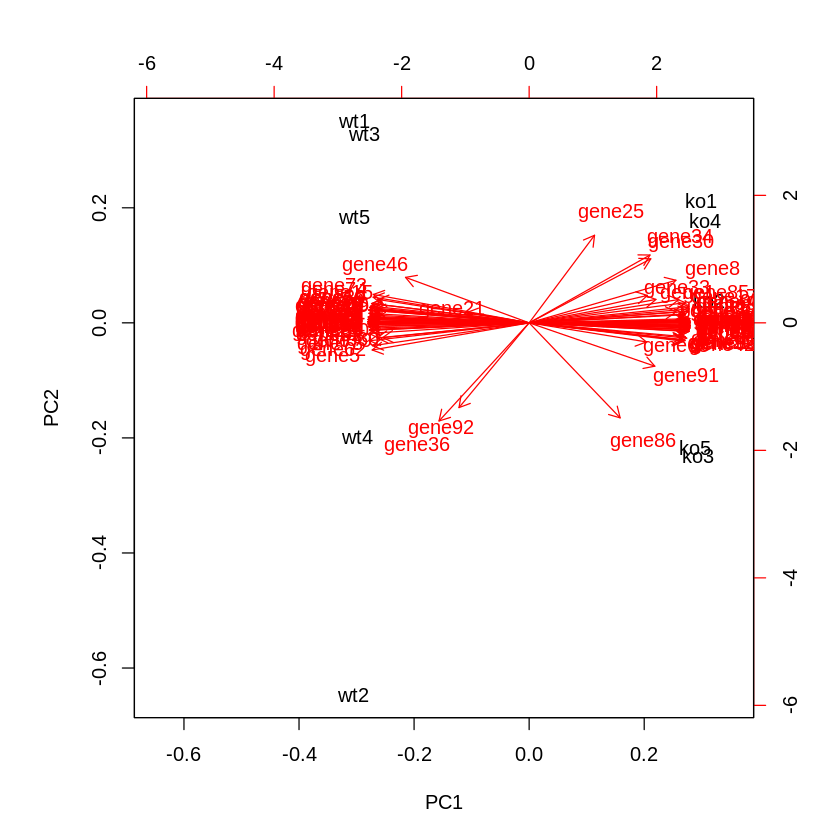

In [49]:
#::GMG::There's a R base function for plotting PCAs rotation and x
# https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/biplot
# https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/
biplot(pca)

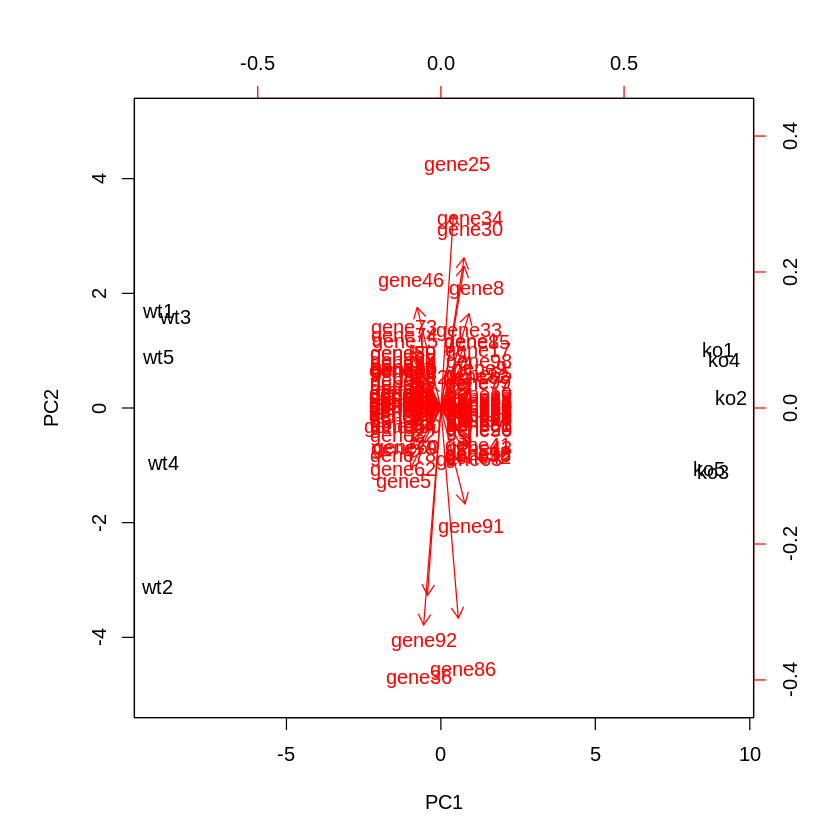

In [91]:
#::GMG::The above biplot is a mess :)
# https://stackoverflow.com/questions/17055291/r-how-to-make-pca-biplot-more-readable
#::NOTE::It's difficult to mess with the coordinates to get a decent view :(
#biplot(pca, expand = 2, ylim = c(-0.7, 0.4), xlim = c(-0.3, 0.3))
# https://www.r-bloggers.com/principal-component-analysis-using-r/
biplot(pca, scale = 0, expand = 2.5, ylim= c(-5,5))

In [92]:
#::GMG::Trick
# https://gist.github.com/xwu/ddf04c763c80ca418ccc
# PCA by sample:
# center each gene (mean) without scaling
# scale each sample (root mean square) without centering
# transpose the matrix to PCA by sample instead of by gene
# https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/scale
#::NOTE::I don't really understand this :(
a <- scale(t(data.matrix), center=TRUE, scale=FALSE)
b <- scale(t(a), center=FALSE, scale=TRUE)
my.pca <- prcomp(t(b), center=FALSE)

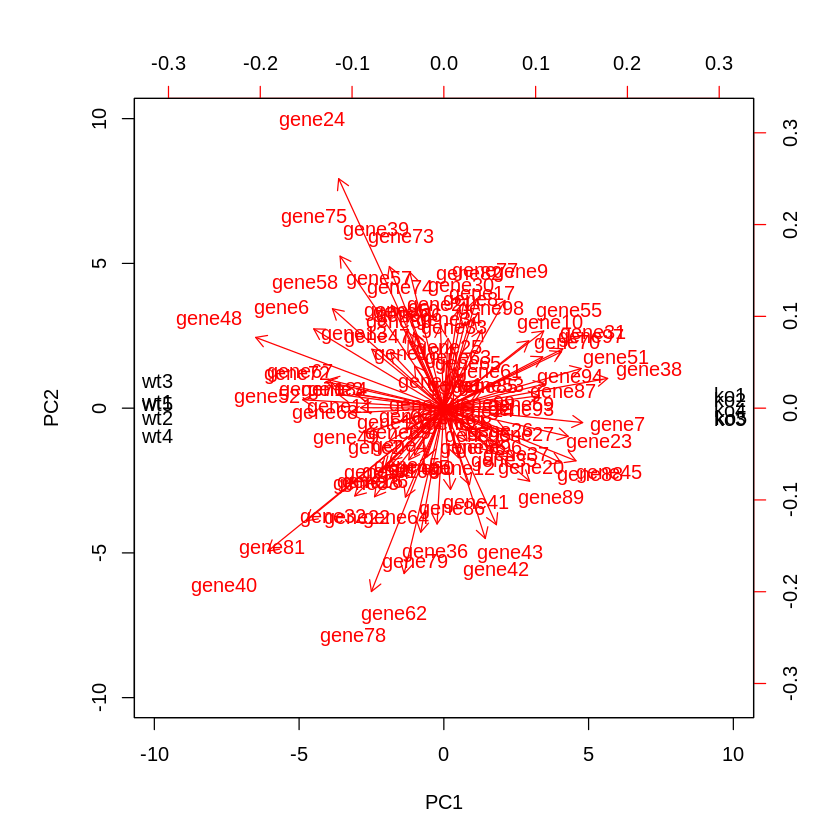

In [101]:
biplot(my.pca, scale = 0)

### ggbiplot

**::NOTE::** I'm unable to install it automatically with `using()`

```R
using('ggbiplot')

Loading required package: ggbiplot
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggbiplot’”Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
Warning message:
“package ‘ggbiplot’ is not available (for R version 3.6.0)”Loading required package: ggbiplot
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggbiplot’”

    FALSE
```

**::GMG::** From [its `github`](https://github.com/vqv/ggbiplot) source:

```R
library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis
Downloading GitHub repo vqv/ggbiplot@master

Rcpp (1.0.1 -> 1.0.2) [CRAN]

Installing 1 packages: Rcpp
Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
✔  checking for file ‘/tmp/RtmpPtXigG/remotes3e7b24df3bb2/vqv-ggbiplot-7325e88/DESCRIPTION’ (650ms)
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   

Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
```

In [51]:
#::GMG::Biostars
#
# Question: performing a PCA on a gene set in R
# https://www.biostars.org/p/289333/
#
#::NOTE::ggbiplot
# https://www.rdocumentation.org/packages/ggbiplot/versions/0.55
# https://www.rdocumentation.org/packages/ggbiplot/versions/0.55/topics/ggbiplot
# https://github.com/vqv/ggbiplot
# https://rdrr.io/github/vqv/ggbiplot/
# https://stackoverflow.com/questions/40287943/ggbiplot-change-the-group-color-and-marker
using('ggbiplot')

Loading required package: ggbiplot
Loading required package: plyr
Loading required package: scales
Loading required package: grid


In [52]:
#::GMG::Canonical example from github README.md
data(wine)

In [53]:
ls(pattern = 'wine')

[1] "wine"       "wine.class"

In [54]:
str(wine)

'data.frame':	178 obs. of  13 variables:
 $ Alcohol       : num  14.2 13.2 13.2 14.4 13.2 ...
 $ MalicAcid     : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash           : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ AlcAsh        : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Mg            : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Phenols       : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flav          : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ NonFlavPhenols: num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proa          : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color         : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue           : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD            : num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ Proline       : int  1065 1050 1185 1480 735 1450 1290 1295 1045 1045 ...


In [55]:
str(wine.class)

 Factor w/ 3 levels "barolo","grignolino",..: 1 1 1 1 1 1 1 1 1 1 ...


In [57]:
levels(wine.class)

[1] "barolo"     "grignolino" "barbera"

In [61]:
length(wine.class)

[1] 178

In [58]:
wine.pca <- prcomp(wine, scale. = TRUE)

In [59]:
str(wine.pca)

List of 5
 $ sdev    : num [1:13] 2.169 1.58 1.203 0.959 0.924 ...
 $ rotation: num [1:13, 1:13] -0.14433 0.24519 0.00205 0.23932 -0.14199 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:13] "Alcohol" "MalicAcid" "Ash" "AlcAsh" ...
  .. ..$ : chr [1:13] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:13] 13 2.34 2.37 19.49 99.74 ...
  ..- attr(*, "names")= chr [1:13] "Alcohol" "MalicAcid" "Ash" "AlcAsh" ...
 $ scale   : Named num [1:13] 0.812 1.117 0.274 3.34 14.282 ...
  ..- attr(*, "names")= chr [1:13] "Alcohol" "MalicAcid" "Ash" "AlcAsh" ...
 $ x       : num [1:178, 1:13] -3.31 -2.2 -2.51 -3.75 -1.01 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:13] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


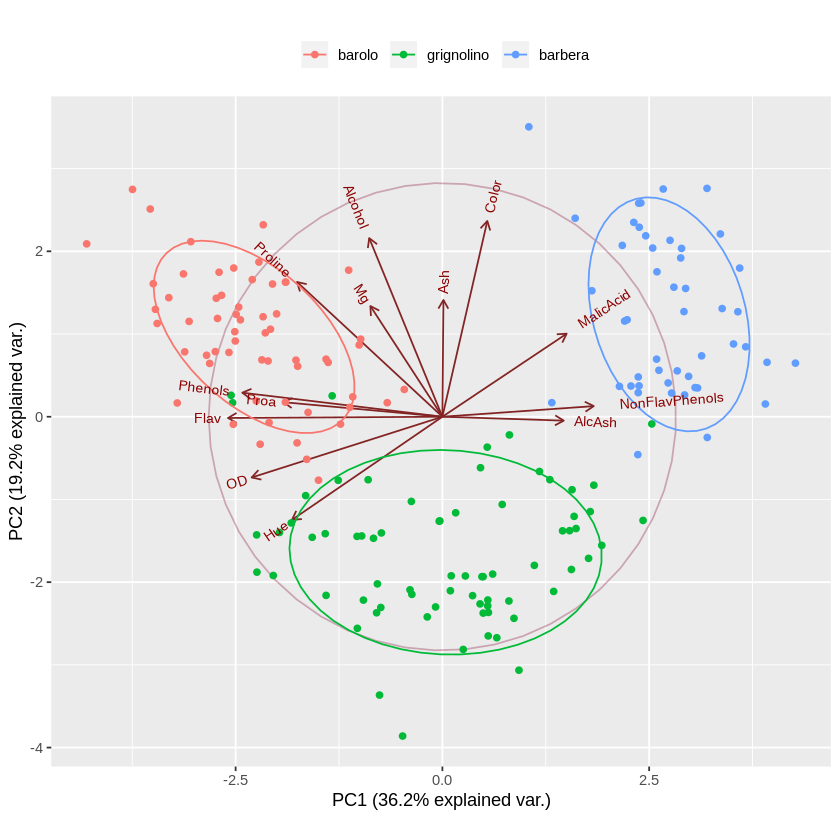

In [60]:
ggbiplot(wine.pca, obs.scale = 1, var.scale = 1,
  groups = wine.class, ellipse = TRUE, circle = TRUE) +
  scale_color_discrete(name = '') +
  theme(legend.direction = 'horizontal', legend.position = 'top')